# Social Media Analysis

## Data Collected

### Key word: elon


In [1]:
#Installing Packages

In [2]:
import time

In [3]:
!pip install tweepy

In [4]:
!pip install nltk
import nltk
nltk.download('punkt')
!pip install matplotlib
!pip install textblob
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhilashyadav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from collections import Counter 
import warnings
from textblob import TextBlob
import matplotlib.pyplot as plt
import pickle
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhilashyadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAALOwhQEAAAAAJRekPtUq2inka5B8z0zlUZwx7FI%3DJqjHmuX1cHRtIoFSmjzIeTrmXEKgomu2qfLmee0QHtm9NwOyDw"
from TwitterCollector import TwitterCollector

In [7]:
!pip install wordcloud
from wordcloud import WordCloud

In [8]:
from datetime import datetime

In [9]:
import requests 
import re

In [10]:
#importing data and preliminary analysis

In [11]:
import json
from pprint import pprint 

# Load JSON: json_data
with open("recent_post_elon -is-retweet lang-en_10000.json","r") as json_file:
    goat_dict = json.load(json_file)


In [12]:
len(goat_dict['tweets'])

10000

In [13]:
goat = pd.DataFrame(goat_dict)

In [14]:
goat = pd.concat([goat.drop(['tweets'],axis = 1),goat['tweets'].apply(pd.Series)],axis = 1)
#reference:https://stackoverflow.com/questions/38231591/split-explode-a-column-of-dictionaries-into-separate-columns-with-pandas

In [15]:
#remove all the websites from the text
import re
goat['cleantext'] = goat['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
#https://stackoverflow.com/questions/51994254/removing-url-from-a-column-in-pandas-dataframe

In [16]:
#list of author ids
author_ids = goat['author_id'].unique()
author_ids = author_ids.reshape(-1, 1).tolist()
author_ids

[['210196091'],
 ['1575215244414271488'],
 ['123762379'],
 ['799248665386725377'],
 ['15336752'],
 ['379931926'],
 ['1383761670632132617'],
 ['1445987971258322945'],
 ['1191017748484116480'],
 ['533443457'],
 ['1095755859026571264'],
 ['1043586602478505986'],
 ['3249961392'],
 ['1548483825289687041'],
 ['1513851000213446658'],
 ['1360061870800044032'],
 ['1187180271805882368'],
 ['1560107385401708544'],
 ['1379554768708771843'],
 ['738182158813138944'],
 ['3274789974'],
 ['320784391'],
 ['1224565337800114177'],
 ['1416937591052640257'],
 ['1475283928629972996'],
 ['784720785999003648'],
 ['93214533'],
 ['1271450338932019201'],
 ['1504605310635421705'],
 ['1570151270891286530'],
 ['1487926103549243395'],
 ['845225862'],
 ['816902995799511040'],
 ['1406722856617189379'],
 ['3344178413'],
 ['1359142427928444932'],
 ['519245371'],
 ['87813288'],
 ['1503514302560362498'],
 ['703327532'],
 ['27095215'],
 ['81852437'],
 ['1306206349974474753'],
 ['2865739799'],
 ['1524871647441735680'],
 ['35

# PART B

### 1a.what are the most popular words with stopwords?

In [17]:
with open('stopwords.pkl', 'rb') as f: #rb es para leer binary
    stopwords = pickle.load(f)

In [18]:
words_goat = []

for tweet in goat_dict['tweets']:
    txt = tweet['text'].lower()
    words_goat.extend(txt.split())

Counter(words_goat).most_common(10)

[('elon', 8185),
 ('to', 6661),
 ('the', 6548),
 ('a', 3580),
 ('is', 3552),
 ('twitter', 3327),
 ('i', 3259),
 ('and', 3151),
 ('of', 3110),
 ('musk', 3014)]

### 1b.what are the most popular words without stopwords?

In [199]:
words_goat2 = [] 
    
for w in words_goat:
    if w not in stopwords and len(w) > 1:
        words_goat2.append(w)

Counter(words_goat2).most_common(10)

[('elon', 8185),
 ('twitter', 3327),
 ('musk', 3014),
 ('@elonmusk', 1458),
 ('buy', 766),
 ('buying', 744),
 ('like', 736),
 ('make', 686),
 ('bots', 554),
 ('help', 547)]

### 2.What are the ten most popular hashtags (#hashtag)?

In [20]:
hashtag_goat = []

for w in words_goat:
    if "#" in w:
        hashtag_goat.append(w)
        
Counter(hashtag_goat).most_common(10)

[('#elon', 504),
 ('#elonmusks', 377),
 ('#bitoin', 315),
 ('#elonmusk', 142),
 ('#twitter', 121),
 ('#bitcoin', 85),
 ('#overwatch2', 43),
 ('#wwenxt', 42),
 ('#usa', 37),
 ('#ai', 26)]

### 3.What are the ten most frequently mentioned usernames?

In [21]:
username_goat = []

for w in words_goat:
    if "@" in w:
        username_goat.append(w)
        
Counter(username_goat).most_common(10)

[('@elonmusk', 1458),
 ('@lexfridman', 143),
 ('@joebiden', 135),
 ('@catturd2', 127),
 ('@thenotoriousmma', 104),
 ('@youtube', 103),
 ('@twitter', 94),
 ('@zelenskyyua', 91),
 ('@jackposobiec', 70),
 ('@nickadamsinusa', 68)]

### 4.Which are the three most common sources of the tweets? 

In [22]:
words_goat4 = []

for tweet in goat_dict['tweets']:
    txt = tweet['source']
    words_goat4.append(txt)

Counter(words_goat4).most_common(3)

[('Twitter for iPhone', 3525),
 ('Twitter Web App', 3034),
 ('Twitter for Android', 2224)]

### 5.Create a line chart to show the time trend of tweet counts (number of tweets in a day (or an hour or a minute) depending on the collected data).

In [23]:
goat['created_at'] = pd.to_datetime(goat['created_at'])

In [24]:
tweet_df_2min = goat.groupby(pd.Grouper(key='created_at', freq='2Min', convention='start')).size()
#https://cvw.cac.cornell.edu/PyDataSci1/tweets_retweets

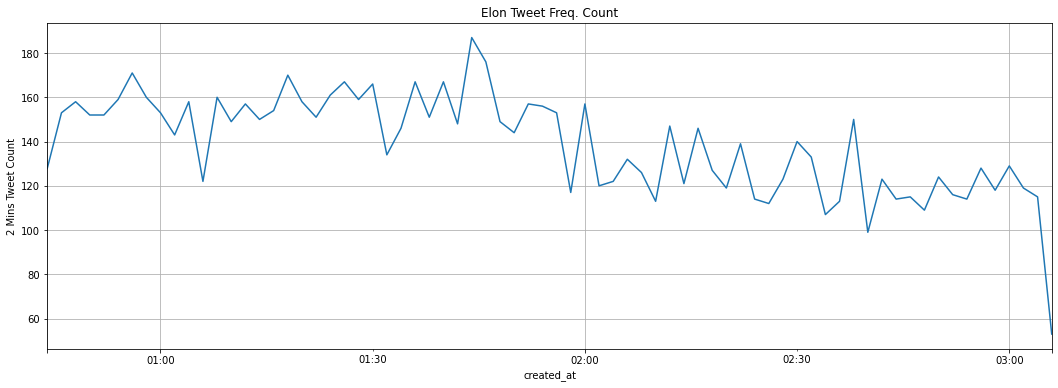

In [25]:
tweet_df_2min.plot(figsize=(18,6))
plt.ylabel('2 Mins Tweet Count')
plt.title('Elon Tweet Freq. Count')
plt.grid(True)

### 6.Which are the three most influential tweets? A tweet’s influence score is the sum of “quote_count”, “reply_count”, “retweet_count”, “like_count”

In [26]:
goat['quote_count'] = [d.get('retweet_count') for d in goat.public_metrics]
goat['reply_count'] = [d.get('reply_count') for d in goat.public_metrics]
goat['retweet_count'] = [d.get('retweet_count') for d in goat.public_metrics]
goat['like_count'] = [d.get('like_count') for d in goat.public_metrics]
goat['influence_score'] = goat['quote_count'] + goat['reply_count'] + goat['retweet_count'] + goat['like_count']

In [27]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(goat.sort_values(by = ['influence_score'], ascending = False)['text'].head(3))

,text
9871,Elon's first day at Twitter? https://t.co/YRklcYXUnn
8161,Elon Musk would alter the outcome of the next election -- by making things fair.
6379,Elon Musk buying Twitter is a big deal.\n\nThis platform is more powerful (for potentially good and bad) than most people realise.


### 7.Who are the three most vocal authors on the keyword? In other words, who are the most frequently tweeting authors in the tweet data?

In [28]:
# please fill in your bearer token here
bearer_token = r"AAAAAAAAAAAAAAAAAAAAALOwhQEAAAAAJRekPtUq2inka5B8z0zlUZwx7FI%3DJqjHmuX1cHRtIoFSmjzIeTrmXEKgomu2qfLmee0QHtm9NwOyDw"

# initialize a TwitterCollector instance
tc = TwitterCollector(bearer_token = bearer_token)

In [29]:
authors = goat['author_id'].unique().tolist()

author_info_data1= authors[1:500]
author_info_data2= authors[501:1000]
author_info_data3= authors[1001:1500]
author_info_data4= authors[1501:2000]
author_info_data5= authors[2001:2500]
author_info_data6= authors[2501:3000]
author_info_data7= authors[3001:3500]
author_info_data8= authors[3501:4000]
author_info_data9= authors[4001:4500]
author_info_data10= authors[4501:5000]
author_info_data11= authors[5001:5500]
author_info_data12= authors[5501:6000]
author_info_data13= authors[6001:6500]
author_info_data14= authors[6501:7000]
author_info_data15= authors[7001:7500]
author_info_data16= authors[7501:len(authors)]


In [30]:

def get_author_info(info_list):
   
    author_info_test = []
    author_info_na= []
    author_id = []
    
    
    for i in info_list:
        
        try:
            author_info = tc.fetch_author_info(i)
            author_info_test.append(author_info)
            author_id.append(i)
        
        except:
            author_info_na.append(i)
            time.sleep(5*60)
            
        
    df = pd.DataFrame()
    df['author_id'] = author_id
    df['author_info'] = author_info_test
    
    return df 
#Discussed the idea with a couple of colleagues and coded it on my own
#https://piazza.com/class/l6361peonhd70r/post/217

In [31]:
df_author_info_data1 = get_author_info(author_info_data1)

In [32]:
df_author_info_data2 = get_author_info(author_info_data2)

In [33]:
df_author_info_data3 = get_author_info(author_info_data3)

In [34]:
df_author_info_data4 = get_author_info(author_info_data4)

In [35]:
df_author_info_data5 = get_author_info(author_info_data5)

In [36]:
df_author_info_data6 = get_author_info(author_info_data6)

In [37]:
df_author_info_data7 = get_author_info(author_info_data7)

In [38]:
df_author_info_data8 = get_author_info(author_info_data8)

In [39]:
df_author_info_data9 = get_author_info(author_info_data9)

In [40]:
df_author_info_data10 = get_author_info(author_info_data10)

In [41]:
df_author_info_data11 = get_author_info(author_info_data11)

In [42]:
df_author_info_data12 = get_author_info(author_info_data12)

In [43]:
df_author_info_data13 = get_author_info(author_info_data13)

In [44]:
df_author_info_data14 = get_author_info(author_info_data14)

In [45]:
df_author_info_data15 = get_author_info(author_info_data15)

In [46]:
df_author_info_data16 = get_author_info(author_info_data16)

In [47]:
df_all = [df_author_info_data1,df_author_info_data2,df_author_info_data3,df_author_info_data4,df_author_info_data5,
         df_author_info_data6,df_author_info_data7,df_author_info_data8,df_author_info_data9,df_author_info_data10,
         df_author_info_data11,df_author_info_data12,df_author_info_data13,df_author_info_data14,df_author_info_data15,
         df_author_info_data16]

In [48]:
df_author_info_final = pd.concat(df_all,axis = 0)

In [49]:
df_author_info_final.to_csv('df_author_info_final.csv')

In [50]:
df_author_info_final['public_metrics'] = [d.get('public_metrics') for d in df_author_info_final.author_info]
df_author_info_final['followers_count'] = [d.get('followers_count') for d in df_author_info_final.public_metrics]
df_author_info_final['following_count'] = [d.get('following_count') for d in df_author_info_final.public_metrics]
df_author_info_final['tweet_count'] = [d.get('tweet_count') for d in df_author_info_final.public_metrics]
df_author_info_final['listed_count'] = [d.get('listed_count') for d in df_author_info_final.public_metrics]
df_author_info_final['author_name'] = [d.get('username') for d in df_author_info_final.author_info]
df_author_info_final['author_influence_score'] = df_author_info_final['followers_count'] + df_author_info_final['following_count'] +df_author_info_final['tweet_count'] + df_author_info_final['listed_count']

In [51]:
author_info_df = goat.merge(df_author_info_final, on = 'author_id', how = 'left')

In [66]:
(pd.DataFrame(df_author_info_final.sort_values(by = 'tweet_count', ascending = False).head(3))).iloc[:,[0,5,7]]

,author_id,tweet_count,author_name
189,2669983818,50717850,test5f1798
237,1420660507,2823205,Knewz_Currently
485,3069279631,2129439,ReciteSocial


### 8. Who are the three most influential authors? A user’s influence score is the sum of “followers_count”, “following_count”, “listed_count”, “tweet_count” in the author data.

In [55]:
pd.DataFrame(df_author_info_final.sort_values(by = 'author_influence_score', ascending = False)['author_name'].head(3))

,author_name
189,test5f1798
461,Reuters
127,FoxNews


# PART C


In [194]:
#Wordcloud

In [253]:
stopwords_appended = stopwords + username_goat + hashtag_goat 

new_stopwords = ['s','amp','a', 'i','this','that', ]

import string

def clean_text(text):

    text = text.lower()
    text = re.sub('[\[\(].*?[\)\]]', '', text)
    text = re.sub('@[^\s]+','',text) # to remove all @
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[\“\–]', '', text)
    return text
#https://www.kaggle.com/code/miguelcorraljr/ted-word-clouds

goat['clean_text_1'] = pd.DataFrame(goat['cleantext'].apply(lambda x: clean_text(x)))
clean_text_2 = goat['clean_text_1'].tolist()

words_after_cleaning = []

for w in clean_text_2:
    if w not in stopwords_appended and len(w) > 1:
        words_after_cleaning.append(w)
        

new_stopwords = ['s','amp','a', 'i','this','that', 'it','is','for','or','hi','will be','me','get','but','like','they',
                'get','is','who','so','up to', 't','its','am','and','in','he','on','no','my','one','as','his','just your',
                'what','with the','about','we','with the', 'could','was','how','all','out','all','are','just','your',
                 'just your','have','to','have to', 'well','know','the','of','be','with','would','then','at','not',
                'their','u','join','now','back','will','you will','you','can','from','do','make','by','up','let','if',
                'also','want','any','because','said','when','might','still','said','hes','thing','give','keep','when',
                'because','re','an','cant','any','an','there','these','when','don','there','very','there','going']

In [255]:
# lower max_font_size

# words_after_cleaning = list(set(words_after_cleaning))
text = ''.join(words_after_cleaning)
wordcloud = WordCloud(width=800, height=400, stopwords = new_stopwords).generate(text) # note that text is a string, not a list

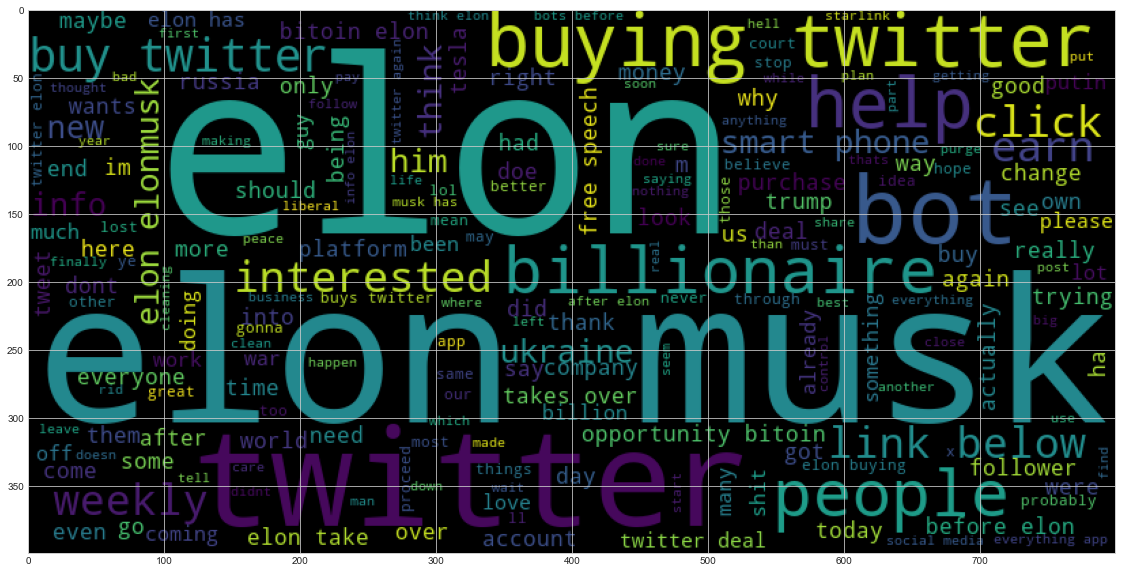

In [256]:
# Display the generated image:
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("on") # turn on axis
plt.savefig('my_word_cloud.png') # save as PNG file
plt.savefig('my_word_cloud.pdf') # save as PDF file
plt.show()  # show in Jupyter notebook

In [127]:
words_goat100 = []

for tweet in words_after_cleaning:
    words_goat100.extend(tweet.split())

Counter(words_goat100).most_common(500)

[('elon', 9463),
 ('to', 6626),
 ('the', 6489),
 ('twitter', 4340),
 ('is', 3605),
 ('a', 3558),
 ('musk', 3304),
 ('i', 3266),
 ('and', 3127),
 ('of', 3076),
 ('you', 2824),
 ('for', 2190),
 ('that', 1848),
 ('in', 1834),
 ('with', 1769),
 ('it', 1720),
 ('just', 1609),
 ('he', 1521),
 ('on', 1452),
 ('be', 1384),
 ('will', 1352),
 ('if', 1301),
 ('this', 1288),
 ('are', 1122),
 ('but', 1103),
 ('your', 1008),
 ('all', 1007),
 ('his', 950),
 ('up', 922),
 ('can', 913),
 ('not', 911),
 ('have', 864),
 ('they', 832),
 ('🔥', 776),
 ('buy', 773),
 ('so', 768),
 ('about', 764),
 ('buying', 748),
 ('like', 743),
 ('bots', 729),
 ('as', 704),
 ('make', 689),
 ('what', 661),
 ('has', 660),
 ('over', 645),
 ('do', 619),
 ('at', 597),
 ('deal', 584),
 ('was', 576),
 ('now', 572),
 ('out', 558),
 ('help', 555),
 ('we', 534),
 ('people', 531),
 ('back', 529),
 ('my', 526),
 ('going', 491),
 ('before', 485),
 ('would', 481),
 ('or', 481),
 ('can’t', 481),
 ('get', 473),
 ('from', 467),
 ('an', 467

# PART D


In [145]:
def text_blob_polarity(text):
    goat_polarity = TextBlob(text)
    polarity = goat_polarity.sentiment.polarity
    return polarity

def text_blob_subjectivity(text):
    goat_sub = TextBlob(text)
    polarity = goat_sub.sentiment.subjectivity
    return polarity

def Sentiment(df,text_field):
    
    df['goat_polarity'] = df[text_field].apply(text_blob_polarity)
    df['goat_sub'] = df[text_field].apply(text_blob_subjectivity)
    return df
#https://github.com/reallyrehan/pollytics/tree/main/Data%20Processing

In [150]:
goat_final = Sentiment(goat,'text')

In [151]:
#What are the average polarity?
round(goat_final["goat_polarity"].mean(),3)

0.079

In [152]:
#What are the average subjectivity?
round(goat_final["goat_sub"].mean(),3)

0.351

Text(0.5, 0, 'Polarity')

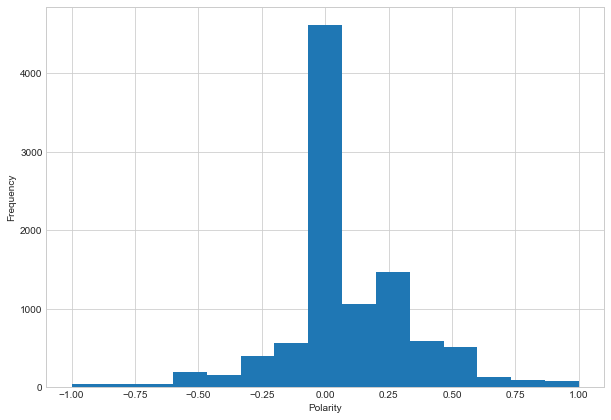

In [160]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.hist(goat_final['goat_polarity'],bins = 15)
plt.ylabel('Frequency')
plt.xlabel('Polarity')

Text(0.5, 0, 'Subjectivity')

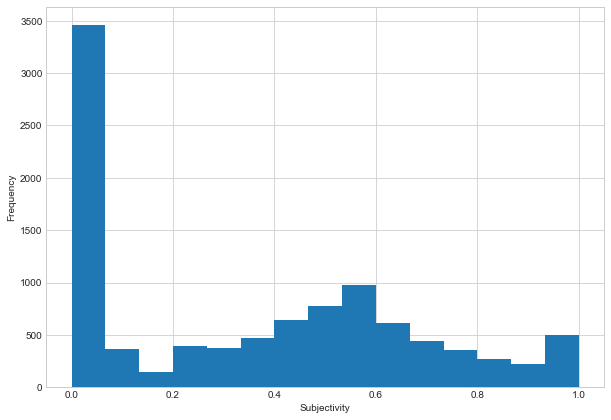

In [161]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.hist(goat_final['goat_sub'],bins = 15)
plt.ylabel('Frequency')
plt.xlabel('Subjectivity')

In [167]:
#3 most unhappy tweets
pd.set_option('display.max_colwidth', None)
top_3_neg = goat_final.sort_values(by =['goat_polarity'])
pd.DataFrame(top_3_neg['text'].head(3))

,text
1751,"@soap_ai Can't wait for this fake word pronouns to fade into irrelevance, oh wait, it happened the moment clowns tried to make it a thing!! Thank God for Elon, go kick rocks woke clowns!!!"
829,"@CardinalDolan @SIRIUSXM @FatherDaveDwyer https://t.co/8jroKWMOKJ\n\nI told Elon and men to go through You, Cardinal Tobin, or Cardinal Wilton Gregory or I wasn't going to work with the men. They are vicious to me fromboth and I'm done with the abuse"
1038,3:1 odds\n\nElon is here to do Evil https://t.co/Oyexn3mBdW


In [169]:
#3 most happy tweets
pd.set_option('display.max_colwidth', None)
top_3_pos = goat_final.sort_values(by =['goat_polarity', 'goat_sub'], ascending = False)
pd.DataFrame(top_3_pos['text'].head(3))

,text
859,@HereLiesLolo @ScottPresler @JoeBiden Another perfect example of why Elon won't do $hit about all the bots that promote their bs.
1713,Elon Musk buying TWITTER is a wonderful thing..FREE SPEECH AGAIN😉😉😉
1807,Are you happy Elon Musk is buying Twitter for 44B.?!


## INSIGHTS

Text(0.5, 0, 'Bitcoin_subjectivity')

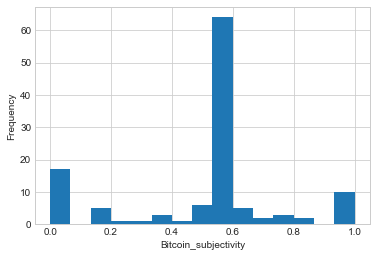

In [176]:
#bitcoin 
plt.hist(goat[goat['text'].str.contains('bitcoin', case=False, na=False)]["goat_sub"],bins=15)
plt.ylabel('Frequency')
plt.xlabel('Bitcoin_subjectivity')

In [177]:
print(goat[goat['text'].str.contains('bitcoin', case=False, na=False)]["goat_sub"].mean())
print(goat[goat['text'].str.contains('bitcoin', case=False, na=False)]["goat_polarity"].mean())

0.5031402116402116
0.11462754779942287


Text(0.5, 0, 'Subjectivity')

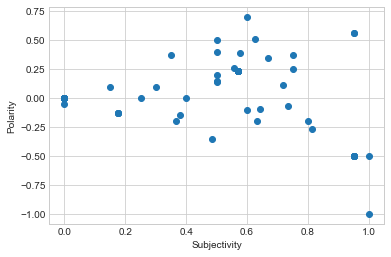

In [179]:
plt.scatter(goat[goat['text'].str.contains('bitcoin', case=False, na=False)]["goat_sub"],goat[goat['text'].str.contains('bitcoin', case=False, na=False)]["goat_polarity"])
plt.ylabel('Polarity')
plt.xlabel('Subjectivity')

,collection_timestamp,tweet_cnt,possibly_sensitive,quote_count,reply_count,retweet_count,like_count,influence_score,goat_polarity,goat_sub
source,,,,,,,,,,
4StateNews,1.664939e+09,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136174,0.567803
@thedextazlab,1.664939e+09,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
AinvestNews,1.664939e+09,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437500,0.625000
Albatross for Twitter,1.664939e+09,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650000,0.794444
App for FundSwift,1.664939e+09,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131818,0.427273
...,...,...,...,...,...,...,...,...,...,...
twitter_analyse_get_on,1.664939e+09,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073333,0.295000
uhiiman_bot,1.664939e+09,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
web4bot,1.664939e+09,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [187]:
mean_by_author = pd.DataFrame(goat.groupby('author_id').mean())

In [190]:
most_influence = pd.DataFrame(df_author_info_final.sort_values(by = 'author_influence_score', ascending = False).head(20))

In [195]:
x = most_influence.merge(mean_by_author,how = 'left', on = 'author_id')
pd.DataFrame(x[['goat_polarity','goat_sub']].mean())

,0
goat_polarity,0.066438
goat_sub,0.393354
